<a href="https://colab.research.google.com/github/Carmen-N/Curso-EDA-/blob/master/Curso_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conociendo nuestros datos de pingüinos. 🗺🧭🐧

Instalar librerías necesarias

In [1]:
!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importar librerías

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

Establecer apariencia general de los gráficos

In [7]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

# Cargar los datos

Utilizando el paquete palmerpenguins

**Datos crudos**

In [4]:
raw_penguines_df = palmerpenguins.load_penguins_raw()
raw_penguines_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


Datos previamente procesados

In [6]:
 preprocess_penguines_df = palmerpenguins.load_penguins()
 preprocess_penguines_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Utilizando los conjuntos de datos de **seaborn**

In [11]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female




**Links de importación de datos:**

https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv

https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv

In [15]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info


In [19]:
preprocess_penguines_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv')
preprocess_penguines_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


# Colecta y validación de datos

¿Qué tipo de dato son las variables del conjunto de datos?

**Validación de los datos**

Es el proceso de asegurar la consistencia y precisión dentro de un conjunto de datos. Para asegurar la consistencia de los datos debemos validar:

**Modelo de datos**: si un tercero recolecto los datos, verifica que preguntas queria responder con los datos. Si eres quien recolecta los datos, hazte muchas preguntas y considera si esos datos son suficientes para responderlas
Seguimiento de formato estándar de archivos: verifica que la extensión de los archivos que estas manejando correspondan con el formato interno que tienen. Asegurate que los numeros se expresen en el formato que estas trabajando.

**Tipos de Datos:** verifica que los datos sen del tipo que se indica en el dataset
**Rango de variables: **verifica que las variables estén dentro del rango establecido en la recoleccion de datos. En caso de encontrar variables fuera del rango preguntate: como llegaron esos datos aqui? tienen algun significado alterno? debo preservarlos o eliminarlos?

**Unicidad:** verifica que tan unicos son los datos. detecta si existe duplicidad en los datos y corrige.

**Consistencia de expresiones:** se refiere a como la persona que recolecta los datos define sus variables. Formato de fecha, de hora, variables escritas de la misma forma en toda la tabla. No son datos erroneos, solo es cuestion de darle el formato adecuado.

**Valores nulos**: pueden estar explicitos o implicitos en el dataset. Son datos faltantes. Porque esta vacio? puedo rellenarlo con otro dato? esta vacio por un proceso aleatorio o tiene un sentido?

**¿Qué tipo de dato son las variables del conjunto de datos?**

In [21]:
preprocess_penguines_df.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

**¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?**

In [24]:
(
    preprocess_penguines_df.dtypes
 .value_counts()
)

object     10
float64     6
int64       1
dtype: int64

## **¿Cuántas variables y observaciones tenemos en el conjunto de datos?**

In [25]:
preprocess_penguines_df.shape

(344, 17)

**¿Existen valores nulos explícitos en el conjunto de datos?**

In [26]:
(
    preprocess_penguines_df
 .isnull()
)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
340,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [28]:
(
    preprocess_penguines_df
 .isnull()
 .any()
)

studyName              False
Sample Number          False
Species                False
Region                 False
Island                 False
Stage                  False
Individual ID          False
Clutch Completion      False
Date Egg               False
Culmen Length (mm)      True
Culmen Depth (mm)       True
Flipper Length (mm)     True
Body Mass (g)           True
Sex                     True
Delta 15 N (o/oo)       True
Delta 13 C (o/oo)       True
Comments                True
dtype: bool

**De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?**

In [29]:
(
    preprocess_penguines_df
 .isnull()
 .sum()
)

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

**¿Cuántos valores nulos tenemos en total en el conjunto de datos?**

In [30]:
(
    preprocess_penguines_df
 .isnull()
 .sum()
 .sum()
)

336

**¿Cuál es la proporción de valores nulos por cada variable?**

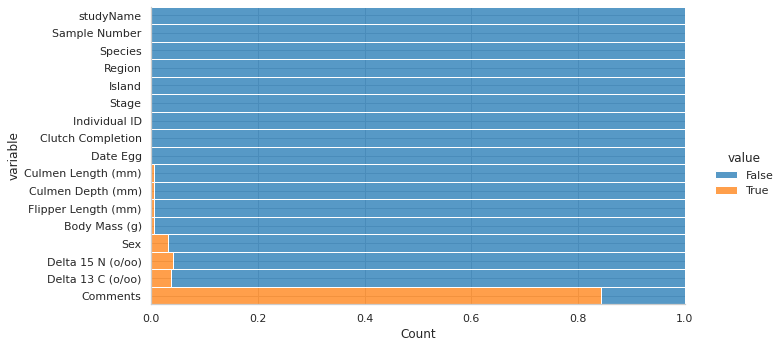

In [34]:

(
    
  preprocess_penguines_df
 .isnull()
 .melt()
 .pipe(
   lambda df:(
       sns.displot(
           data=df,
           y='variable',
           hue='value' ,
           multiple='fill' ,
           aspect=2
       )
     )
   )
)
    


**¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?**

<AxesSubplot: >

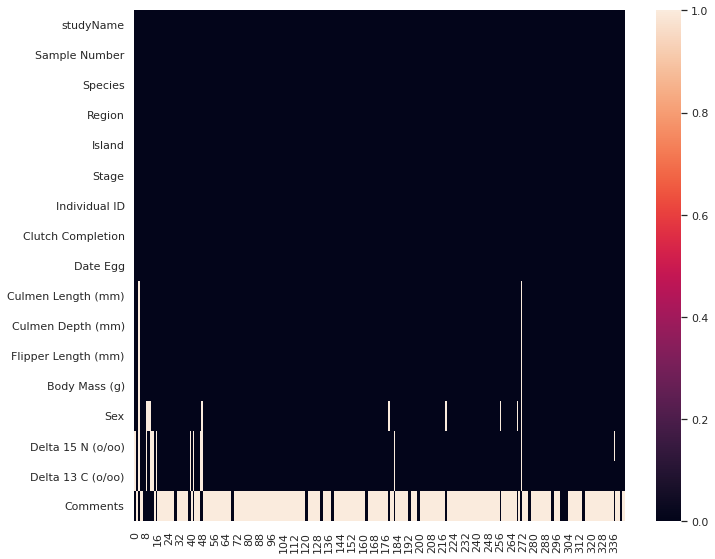

In [36]:
(
    preprocess_penguines_df
 .isnull()
 .transpose()
 .pipe(
     lambda df:(
         sns.heatmap(
             data=df
         )
     )  
  )
)

**¿Cuántas observaciones perdemos si eliminamos los datos faltantes?**

In [39]:

processed_penguins_df = (
    preprocess_penguines_df
    .dropna()
)
processed_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,2007-11-15,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
28,PAL0708,29,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N18A1,No,2007-11-10,37.9,18.6,172.0,3150.0,FEMALE,8.38404,-25.19837,Nest never observed with full clutch.
29,PAL0708,30,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N18A2,No,2007-11-10,40.5,18.9,180.0,3950.0,MALE,8.90027,-25.11609,Nest never observed with full clutch.
38,PAL0708,39,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N25A1,No,2007-11-13,37.6,19.3,181.0,3300.0,FEMALE,9.41131,-25.04169,Nest never observed with full clutch.
68,PAL0809,69,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N32A1,No,2008-11-11,35.9,16.6,190.0,3050.0,FEMALE,8.47781,-26.07821,Nest never observed with full clutch.
69,PAL0809,70,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N32A2,No,2008-11-11,41.8,19.4,198.0,4450.0,MALE,8.86853,-26.06209,Nest never observed with full clutch.
120,PAL0910,121,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N66A1,No,2009-11-17,36.2,17.2,187.0,3150.0,FEMALE,9.04296,-26.19444,Nest never observed with full clutch.
121,PAL0910,122,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N66A2,No,2009-11-17,37.7,19.8,198.0,3500.0,MALE,9.11066,-26.42563,Nest never observed with full clutch.
130,PAL0910,131,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N73A1,No,2009-11-23,38.5,17.9,190.0,3325.0,FEMALE,8.98460,-25.57956,Nest never observed with full clutch.


**ejemplo:**

cuales son las filas con valores nulos y en que columnas se encuentran 

se puede usar el siguiente código :

In [48]:

df= preprocess_penguines_df
lista1=[]
for a in df.columns:
  n=df[df[a].isnull() ==True].index.to_list()
  lista1.append(n)

lista2=[]
for a in lista1 :
  for i in a :
    lista2.append(i)

lista3=list(dict.fromkeys(lista2))
print(lista3)

[3, 271, 8, 9, 10, 11, 47, 178, 218, 256, 268, 0, 12, 13, 15, 39, 41, 46, 182, 336, 1, 2, 4, 5, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 40, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 132, 133, 134, 135, 136, 137, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 194, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 

**Visualizamos las filas con al menos un valor nulo :**

In [49]:
df.iloc[lista3]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
271,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,2009-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled. Nest never observed with fu...
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,2007-11-09,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,2007-11-09,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.
10,PAL0708,11,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N6A1,Yes,2007-11-09,37.8,17.1,186.0,3300.0,NaN,8.63243,-25.21315,No blood sample obtained for sexing.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,PAL0910,62,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N96A2,Yes,2009-11-27,46.8,16.5,189.0,3650.0,FEMALE,9.65061,-24.48153,NaN
338,PAL0910,63,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A1,Yes,2009-11-19,45.7,17.0,195.0,3650.0,FEMALE,9.26715,-24.31912,NaN
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


**ejemplo:**

Otra manera de ver la existencia de valores nulos es mediante una gráfica con seaborn.

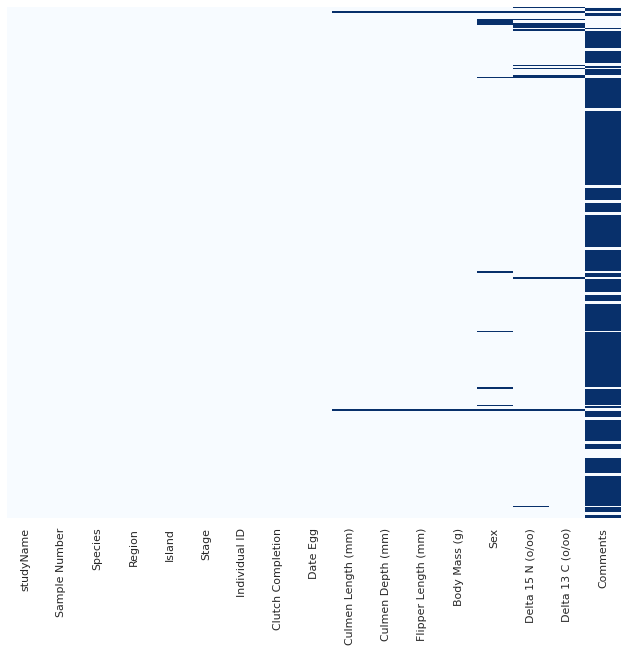

In [51]:
sns.heatmap(preprocess_penguines_df.isnull(), yticklabels=False, cbar=False, cmap="Blues");

# Conteos y proporciones

**Preludio: ¿Qué estadísticos describen el conjunto de datos?**

**Todas las variables**

In [61]:
processed_penguins_df.describe(include='all')

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
count,34,34.000000,34,34,34,34,34,34,34,34.000000,34.000000,34.000000,34.000000,34,34.000000,34.000000,34
unique,3,NaN,3,1,3,1,32,1,17,NaN,NaN,NaN,NaN,2,NaN,NaN,1
top,PAL0708,NaN,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N61A2,No,2007-11-28,NaN,NaN,NaN,NaN,FEMALE,NaN,NaN,Nest never observed with full clutch.
freq,15,NaN,14,34,17,34,2,34,4,NaN,NaN,NaN,NaN,18,NaN,NaN,34
mean,NaN,51.705882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.711765,17.647059,196.735294,3877.205882,NaN,9.018622,-25.334045,NaN
std,NaN,43.966605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800667,1.867138,12.473751,747.327756,NaN,0.542476,0.827722,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.900000,13.700000,172.000000,2700.000000,NaN,7.991840,-26.842720,NaN
25%,NaN,23.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.325000,16.600000,190.000000,3343.750000,NaN,8.626890,-26.076210,NaN
50%,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.500000,17.900000,195.500000,3737.500000,NaN,9.041155,-25.157230,NaN
75%,NaN,68.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.600000,19.150000,201.500000,4237.500000,NaN,9.374057,-24.622540,NaN


 **Solo las numéricas**

In [62]:
processed_penguins_df.describe(include=[np.number])

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,51.705882,44.711765,17.647059,196.735294,3877.205882,9.018622,-25.334045
std,43.966605,5.800667,1.867138,12.473751,747.327756,0.542476,0.827722
min,1.000000,35.900000,13.700000,172.000000,2700.000000,7.991840,-26.842720
25%,23.250000,39.325000,16.600000,190.000000,3343.750000,8.626890,-26.076210
50%,39.000000,44.500000,17.900000,195.500000,3737.500000,9.041155,-25.157230
75%,68.250000,49.600000,19.150000,201.500000,4237.500000,9.374057,-24.622540
max,140.000000,58.000000,20.000000,225.000000,5700.000000,10.025440,-23.890170


**Solo categóricas - 1**

In [63]:
processed_penguins_df.describe(include=[object])

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Sex,Comments
count,34,34,34,34,34,34,34,34,34,34
unique,3,3,1,3,1,32,1,17,2,1
top,PAL0708,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N61A2,No,2007-11-28,FEMALE,Nest never observed with full clutch.
freq,15,14,34,17,34,2,34,4,18,34


**Solo categóricas - 2**

In [67]:
(
    processed_penguins_df
    .astype({
      'Species': 'category',
      'Island' : 'category',
      'Sex'   :  'category'
 })
   .describe(include=object)
)

,studyName,Region,Stage,Individual ID,Clutch Completion,Date Egg,Comments
count,34,34,34,34,34,34,34
unique,3,1,1,32,1,17,1
top,PAL0708,Anvers,"Adult, 1 Egg Stage",N61A2,No,2007-11-28,Nest never observed with full clutch.
freq,15,34,34,2,34,4,34


In [69]:
(
    processed_penguins_df
    .astype({
      'Species': 'category',
      'Island' : 'category',
      'Sex'   :  'category'
 })
   .describe(include='category')
)

,Species,Island,Sex
count,34,34,34
unique,3,3,2
top,Chinstrap penguin (Pygoscelis antarctica),Dream,FEMALE
freq,14,17,18
